In [ ]:
import numpy as np
from PIL import Image
import requests
import cv2
from google.colab.patches import cv2_imshow
import os
from os import listdir
import matplotlib.pyplot as plt


In [ ]:
#two directory where we will store our images
!mkdir otsu_algo
!mkdir otsu_algo/image

# Load the images

In [ ]:
img1 = Image.open(requests.get('https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/119082.jpg',stream=True).raw)
img2 = Image.open(requests.get('https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/170057.jpg',stream=True).raw)
img3 = Image.open(requests.get('https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/58060.jpg',stream=True).raw)
img4 = Image.open(requests.get('https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/163085.jpg',stream=True).raw)
img5 = Image.open(requests.get('https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/157055.jpg',stream=True).raw)
img6 = Image.open(requests.get('https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/295087.jpg',stream=True).raw)
img7 = Image.open(requests.get('https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/16077.jpg',stream=True).raw)
img8 = Image.open(requests.get('https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/gray/86016.jpg',stream=True).raw)

In [ ]:
img1.save('otsu_algo/image/1.png')
img2.save('otsu_algo/image/2.png')
img3.save('otsu_algo/image/3.png')
img4.save('otsu_algo/image/4.png')
img5.save('otsu_algo/image/5.png')
img6.save('otsu_algo/image/6.png')
img7.save('otsu_algo/image/7.png')
img8.save('otsu_algo/image/8.png')

#Otsu Algorithm

In [ ]:
def otsu_algo(img):

    #image to array conversion
    img_array = np.array(img)

    #compute the histogram
    hist, bins = np.histogram(img_array, bins=256, range=(0, 255))
    plt.plot(hist)
    plt.xlabel("Pixel intensity ")
    plt.ylabel("Pixel count")

    #Compute prob for each pixel intensity level
    p = hist / np.sum(hist)

    #compute cummalative sum
    omega = np.cumsum(p)
    mu = np.cumsum(p * np.arange(0, 256))

    #compute global mean and variance
    global_mean = mu[-1]
    global_variance = np.sum(((np.arange(0, 256) - global_mean) ** 2) * p)

    #Compute the between-class variance for all possible thresholds
    best_thresh = 0
    best_variance = 0
    threshold_values = np.array([])
    for i in range(0, 256):
        if omega[i] != 0 and omega[i] != 1:
            between_variance = ((global_mean * omega[i] - mu[i]) ** 2) / (omega[i] * (1 - omega[i]))
            if between_variance > best_variance:
                # threshold_values = np.append([i],axis=0)
                # print(best_thresh)
                best_thresh = i
                best_variance = between_variance
    #print("Best Threshold =",best_thresh)
    threshold_image = img_array >= best_thresh
    Image.fromarray(img_array).show()
    print("Golbal Mean = ",global_mean,"\nGolba Variance",global_variance)
    Image.fromarray(threshold_image.astype(np.uint8) * 255).show()

    threshold_value, threshold_image = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print("Our calculated threshold is ",best_thresh," and CV2 threshold is : ",threshold_value)

    # Add a vertical line for the threshold
    plt.axvline(x=best_thresh, color='red',label='Otsu threshold')
    plt.legend()
    plt.axvline(x=threshold_value, color='green',linestyle='--',label='CV2 threshold')
    plt.legend()
    # separability = np.zeros(len(hist))
    # for threshold in threshold_values:
    #     class1, class2 = np.split(hist,[threshold])
    #     weight1, weight2 = np.sum(class1), np.sum(class2)
    #     mean1, mean2 = np.mean(class1), np.mean(class2)
    #     separability[threshold] = (weight1 * weight2 * (mean1 - mean2)**2) / ((weight1 + weight2)**2)

    return best_thresh

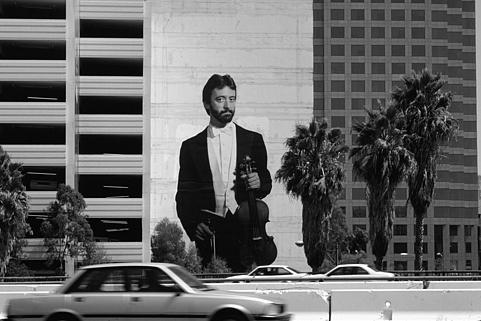

Golbal Mean =  103.81722268638158 
Golba Variance 5307.2762795670515


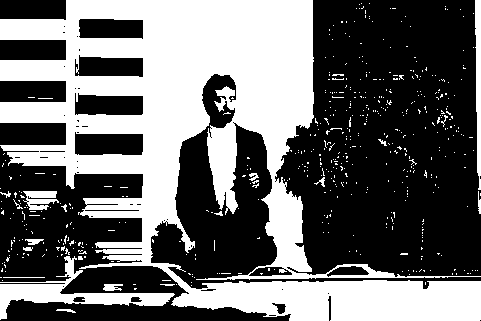

Our calculated threshold is  115  and CV2 threshold is :  115.0


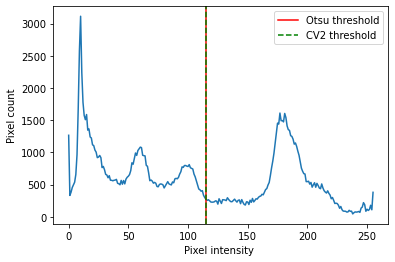

In [ ]:
img = cv2.imread('/content/otsu_algo/image/1.png',cv2.IMREAD_GRAYSCALE)
otsu_thresh = otsu_algo(img)

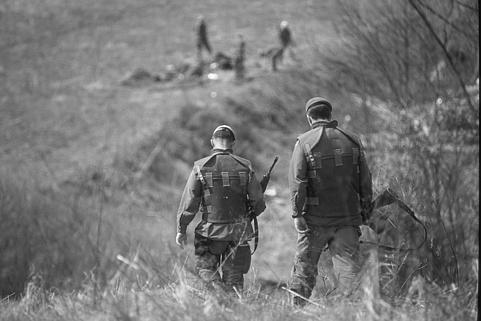

Golbal Mean =  116.96500022668248 
Golba Variance 1286.6187062339297


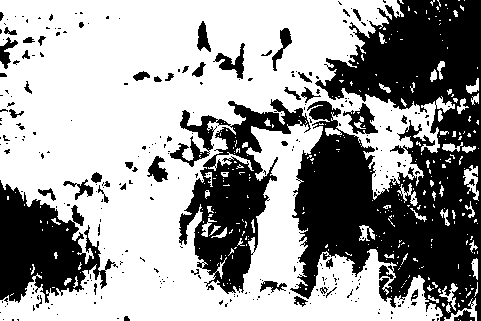

Our calculated threshold is  110  and CV2 threshold is :  110.0


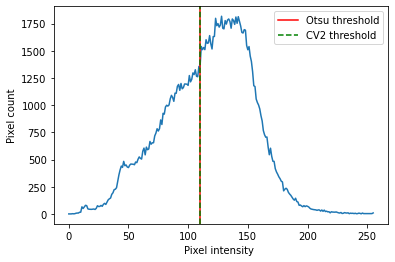

In [ ]:
img = cv2.imread('/content/otsu_algo/image/2.png',cv2.IMREAD_GRAYSCALE)
otsu_thresh = otsu_algo(img)

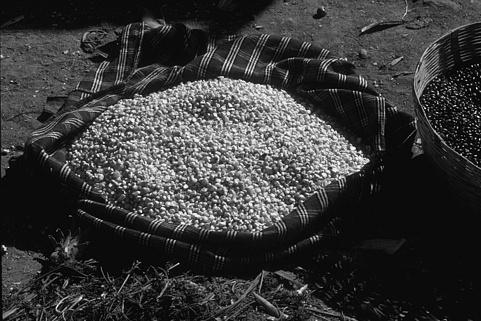

Golbal Mean =  56.34875421791314 
Golba Variance 3044.941109726451


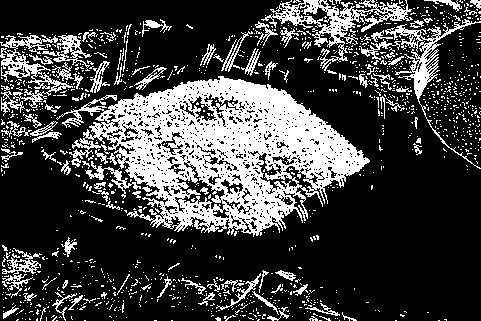

Our calculated threshold is  82  and CV2 threshold is :  82.0


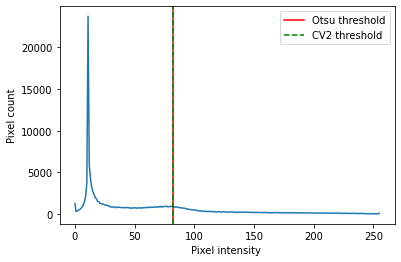

In [ ]:
img = cv2.imread('/content/otsu_algo/image/3.png',cv2.IMREAD_GRAYSCALE)
otsu_thresh = otsu_algo(img)

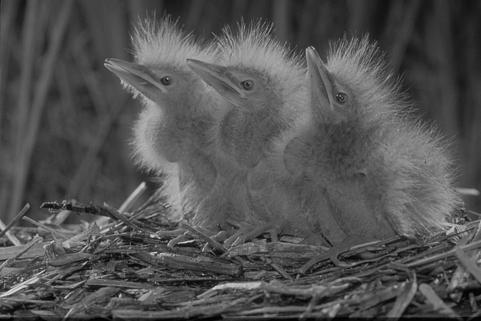

Golbal Mean =  82.70109649548903 
Golba Variance 1012.4598694591571


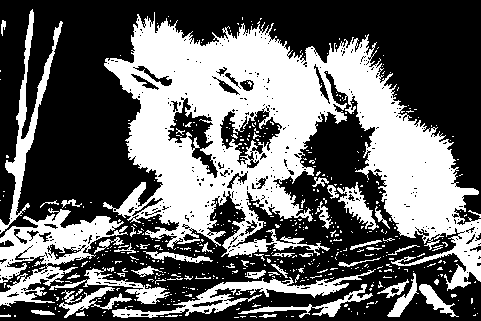

Our calculated threshold is  88  and CV2 threshold is :  88.0


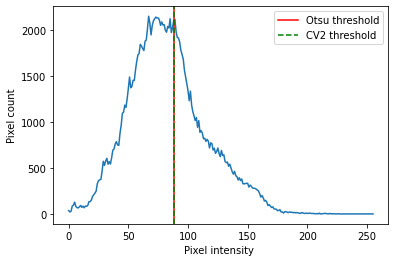

In [ ]:
img = cv2.imread('/content/otsu_algo/image/4.png',cv2.IMREAD_GRAYSCALE)
otsu_thresh = otsu_algo(img)


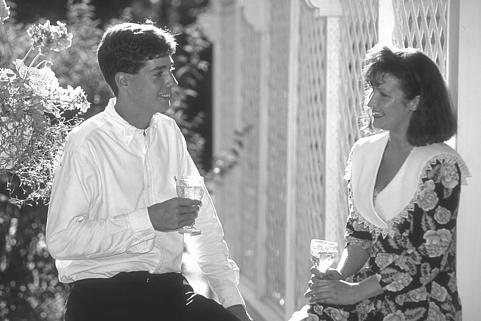

Golbal Mean =  151.81031858601955 
Golba Variance 3474.454399909513


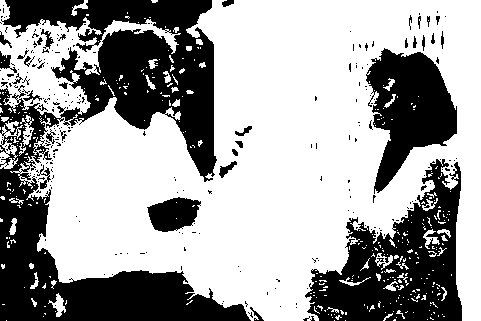

Our calculated threshold is  137  and CV2 threshold is :  137.0


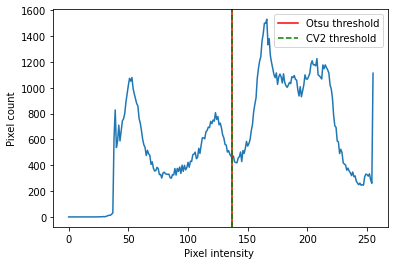

In [ ]:
img = cv2.imread('/content/otsu_algo/image/5.png',cv2.IMREAD_GRAYSCALE)
otsu_thresh = otsu_algo(img)

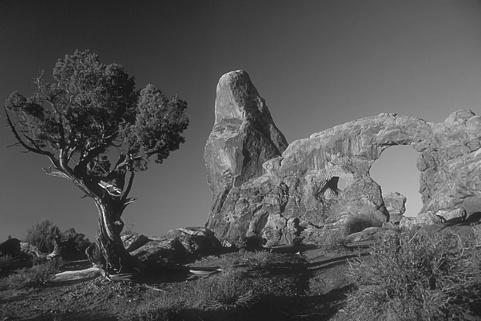

Golbal Mean =  84.93744211501225 
Golba Variance 1390.44264449964


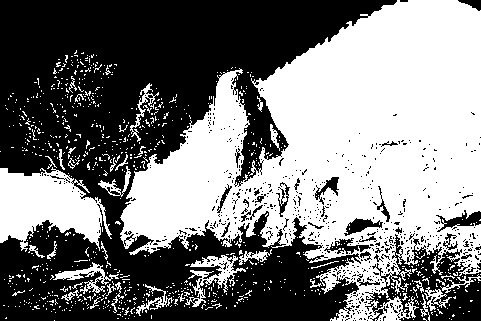

Our calculated threshold is  86  and CV2 threshold is :  86.0


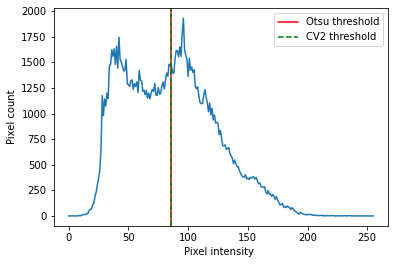

In [ ]:
img = cv2.imread('/content/otsu_algo/image/6.png',cv2.IMREAD_GRAYSCALE)
otsu_thresh = otsu_algo(img)

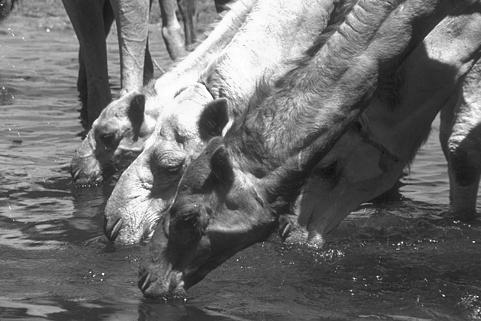

Golbal Mean =  107.29924028989448 
Golba Variance 3446.539304802987


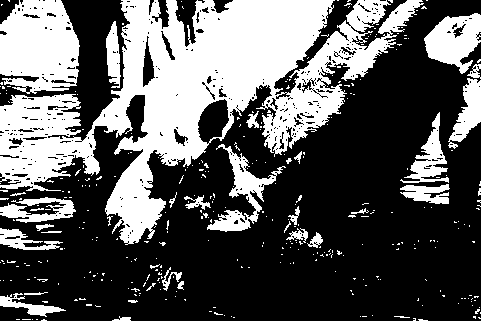

Our calculated threshold is  122  and CV2 threshold is :  122.0


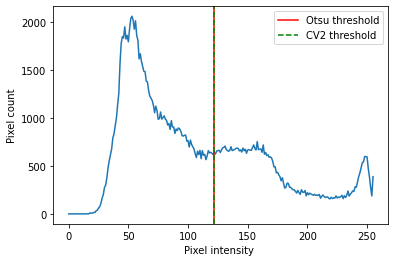

In [ ]:
img = cv2.imread('/content/otsu_algo/image/7.png',cv2.IMREAD_GRAYSCALE)
otsu_thresh = otsu_algo(img)

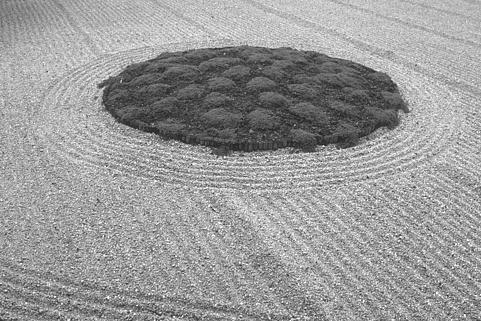

Golbal Mean =  154.13464938698579 
Golba Variance 1932.1855081200547


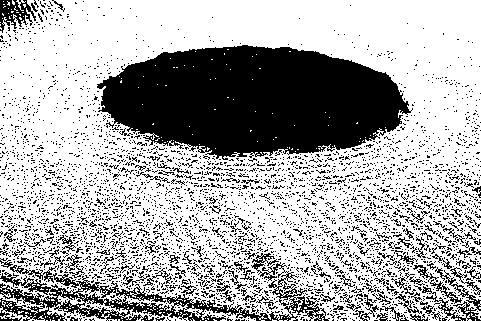

Our calculated threshold is  140  and CV2 threshold is :  140.0


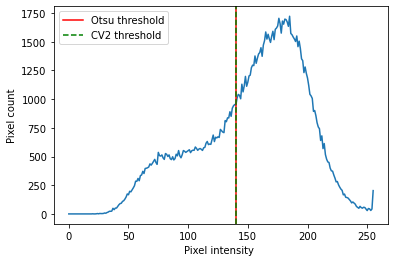

In [ ]:
img = cv2.imread('/content/otsu_algo/image/8.png',cv2.IMREAD_GRAYSCALE)
otsu_thresh = otsu_algo(img)